# Question 1

In [16]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

In [17]:
#ai.
A = .001+A

#aii.
A = A/np.sum(A)


#aiii.
s, E = eigs(csc_matrix(A), k = 1)


In [18]:
#b
np.argsort(np.squeeze(np.abs(E)))[::-1][0]

nodes_dict[np.argsort(np.squeeze(np.abs(E)))[::-1][0]]


'"Wisconsin"'

In [19]:
#c
nodes_dict[np.argsort(np.squeeze(np.abs(E)))[::-1][2]]


'"Madison, Wisconsin"'

# Question 2

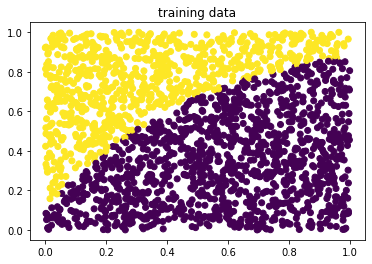

array([[0.36969724, 0.64696387],
       [0.19898362, 0.52560645],
       [0.72201158, 0.52756091],
       ...,
       [0.33377239, 0.05538578],
       [0.55322308, 0.74781499],
       [0.26312632, 0.50754668]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

x_train





In [2]:
A = np.zeros((2,2))

# for i in range(1000):
#     A.append(np.array([10,0]))
    
    
    
    
newrow = [10,0]
for i in range(1000):
    A = np.vstack([A, newrow])
    
    
A.shape

(1002, 2)

### a)
because the log of a 1+ (a small number) is going to be an even smaller number and thus, our function will hav a very small error rate

### b)


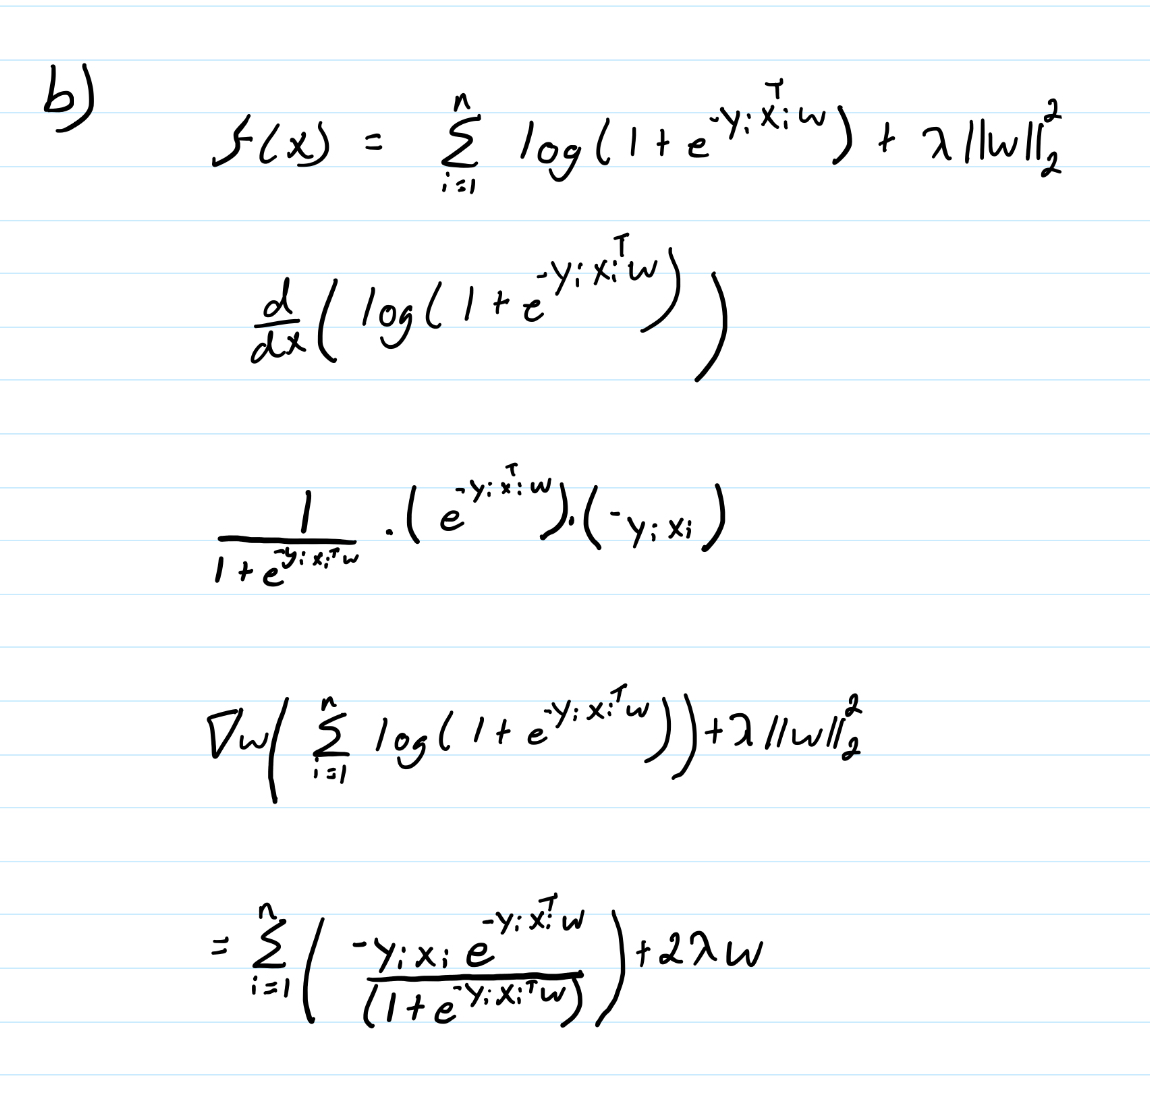

In [15]:
from IPython import display
display.Image("IMG_DCEC02151CC1-1.jpeg")

### c) 

In [3]:
X = np.hstack((x_train,np.ones((n_train,1))))
w_g = np.zeros((3,1))



def gradient(w):
    gradient = np.zeros((3,1))
    for i in range(n_train):
        gradient += (-y_train[i]*X.T[:,[i]]*np.exp(-y_train[i]*X.T[:,[i]].T@w))/(1+np.exp(-y_train[i]*X.T[:,[i]].T@w))
    return gradient + 2*w    
        
        
        
        
        
gradient(w_g)        
        

array([[235.82140194],
       [-78.99054488],
       [230.        ]])

In [4]:
w_new_g = w_g-.001*gradient(w_g) 

it =1
max_its = 1000


while np.linalg.norm(w_g - w_new_g) > .001 and it < max_its:
    w_g = w_new_g
    w_new_g = w_g - .001*gradient(w_g)
    it+= 1
    
    
print(w_new_g,"this is the w_g afte 100 iterations")

[[-6.35777297]
 [ 9.0948291 ]
 [-2.52100401]] this is the w_g afte 100 iterations


### d)

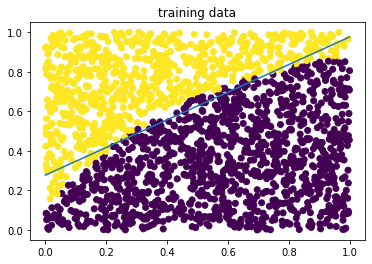

error 0.035


In [5]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])

slope = -w_new_g[0,0]/w_new_g[1,0]
y_int = -w_new_g[2,0]/w_new_g[1,0]
                 
                 
plt.plot([0,1],[y_int,y_int+slope])
plt.title('training data')
plt.show()



print("error", np.mean(y_train != np.sign(X@w_new_g)))

### e)

In [6]:
w_loss = np.zeros((3,1))



def squared_error(w):
    sq_loss = np.zeros((3,1))
    for i in range(n_train):
        sq_loss += (X[[1],:]@w-y_train[i])**2
#         print(sq_loss.shape)
#         print(sq_loss)
    return sq_loss + w**2   
        
        
        
squared_error(w_loss)  

array([[2000.],
       [2000.],
       [2000.]])

In [7]:
w_new_loss = w_loss-.001*squared_error(w_loss) 

it =1
max_its = 10


while np.linalg.norm(w_loss - w_new_loss) > .001 and it < max_its:
    w_loss = w_new_loss
    w_new_loss = w_loss - .001*squared_error(w_loss)
    it+= 1
    
    
print(w_new_loss,"this is the w_loss afte 100 iterations")



[[-inf]
 [-inf]
 [-inf]] this is the w_loss afte 100 iterations


/var/folders/tf/7ws_242910jd5vzy1rr84vhh0000gn/T/ipykernel_59008/1427522951.py:8: RuntimeWarning: overflow encountered in square
  sq_loss += (X[[1],:]@w-y_train[i])**2
/var/folders/tf/7ws_242910jd5vzy1rr84vhh0000gn/T/ipykernel_59008/1427522951.py:11: RuntimeWarning: overflow encountered in square
  return sq_loss + w**2


I had some problems graphing my squared error loss w but it's clear that it will perfomr worse than the logirimitic error as the squared error amplifies the outlier data

### f)

In [8]:
New_X = X

New_y = y_train

newXrow = [10,0,1]
newYrow = [-1]

for i in range(1000):
    New_X = np.vstack([New_X, newXrow])
    New_y = np.vstack([New_y,newYrow])

    
New_X
New_y

n_train


2000

In [9]:
def gradient(w):
    gradient = np.zeros((3,1))
    for i in range(3000):
        gradient += (-New_y[i]*New_X.T[:,[i]]*np.exp(-New_y[i]*New_X.T[:,[i]].T@w))/(1+np.exp(-New_y[i]*New_X.T[:,[i]].T@w))
    return gradient + 2*w    
        
gradient(w_g)        
        

array([[ 0.56786742],
       [-0.7920287 ],
       [ 0.2006364 ]])

In [10]:
w_new_g = w_g-.001*gradient(w_g) 

it =1
max_its = 1000


while np.linalg.norm(w_g - w_new_g) > .001 and it < max_its:
    w_g = w_new_g
    w_new_g = w_g - .001*gradient(w_g)
    it+= 1
    
    
print(w_new_g,"this is the w_g afte 100 iterations")

[[-6.35777297]
 [ 9.0948291 ]
 [-2.52100401]] this is the w_g afte 100 iterations


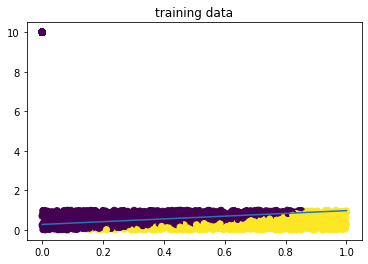

error 0.023333333333333334
The logistic loss model with the added data decreased the amount of error by 1.2%


In [14]:
plt.scatter(New_X[:,1],New_X[:,0], c=New_y[:,0])

slope = -w_new_g[0,0]/w_new_g[1,0]
y_int = -w_new_g[2,0]/w_new_g[1,0]
                 
                 
plt.plot([0,1],[y_int,y_int+slope])
plt.title('training data')
plt.show()




print("error", np.mean(New_y != np.sign(New_X@w_new_g)))
print("The logistic loss model with the added data decreased the amount of error by 1.2%")




